In [31]:
#+.+
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from collections import Counter
import re

In [3]:
data=pd.read_csv('headlines_with_returns.csv')
data.head()

,Time/Date,Tickers,Headlines,ticker,date,return
0,2020-08-28 04:46:00,$CYDY,CytoDyn to update investors on regulatory and...,CYDY,2020-08-28 04:46:00,-0.023256
1,2020-08-28 04:41:00,$AAPL $AAPL $TCEHY,Apple terminates Epic Games' developer account,AAPL,2020-08-28 04:41:00,0.033912
2,2020-08-28 04:38:00,$CCH,Utz Quality Foods and Collier Creek Holdings ...,CCH,2020-08-28 04:38:00,NaN
3,2020-08-28 04:38:00,$LEGN,"Legend Biotech EPS misses by $0.42, misses on...",LEGN,2020-08-28 04:38:00,0.000000
4,2020-08-28 04:37:00,$EDEN,Denmark's AAA rating affirmed by S&P as fisca...,EDEN,2020-08-28 04:37:00,0.000596


In [4]:
#Cleaning
data=data.drop(columns=['Time/Date', 'Tickers']) #drop first two columns
data=data.dropna(subset=['return']) #drop rows with no return value
data.head()

,Headlines,ticker,date,return
0,CytoDyn to update investors on regulatory and...,CYDY,2020-08-28 04:46:00,-0.023256
1,Apple terminates Epic Games' developer account,AAPL,2020-08-28 04:41:00,0.033912
3,"Legend Biotech EPS misses by $0.42, misses on...",LEGN,2020-08-28 04:38:00,0.000000
4,Denmark's AAA rating affirmed by S&P as fisca...,EDEN,2020-08-28 04:37:00,0.000596
6,BNY Mellon Strategic Municipals declares $0.0...,LEO,2020-08-28 04:27:00,0.008516


There are  3859  unique tickers.
The most common tickers featured are: 

AAPL: 70
AMZN: 60
TSLA: 44
MSFT: 41
BA: 36
GOOG: 35
AZN: 34
DIS: 34
MRNA: 27
DKNG: 25
XOM: 25
CVX: 24
T: 23
PFE: 23
WFC: 22
WMT: 21
GILD: 21
AAL: 20
XLF: 20
RHHBY: 20
UBER: 20
GS: 19
XLE: 19
GM: 18
VZ: 18
USO: 17
AMC: 17
KODK: 17
NFLX: 17
JPM: 17
JNJ: 17
FMCC: 16
MCD: 16
RIO: 15
BABA: 15
CCL: 15
NIO: 15
BP: 15
BX: 15
ZM: 14
SPY: 14
F: 14
LLY: 14
SNY: 14
GOLD: 14
HD: 14
NVDA: 14
ROKU: 14
FXI: 13
MPC: 13
ABBV: 13
BLNK: 13
PCG: 13
INTC: 13
AMD: 13
DAL: 13
FCX: 13
TLT: 13
CRM: 13
CYDY: 13
SPCE: 13
MGM: 13
C: 13
NVAX: 13
MARA: 12
TGT: 12
MRK: 12
SRNE: 12
COM: 12
GE: 12
ITB: 12
NAK: 12
BAC: 12
UAL: 12
ET: 12
TEVA: 12
TYL: 12
EBAY: 11
FNMA: 11
PBR: 11
CMCSA: 11
TMO: 11
BHP: 11
W: 11
VALE: 11
SPG: 11
CSCO: 11
AA: 11
BLK: 11
BMY: 11
DKS: 10
ATUS: 10
HAL: 10
ABT: 10
BOXL: 10
RCL: 10
VWAGY: 10
HOG: 10
TSM: 10
PLUG: 10
TTWO: 10
LMT: 10
TLSA: 10
FL: 10
BAESY: 10
ALTO: 10
FSLY: 10
GSK: 9
RDHL: 9
TWLO: 9
RIG: 9
KMDA: 9
LYFT: 9
S

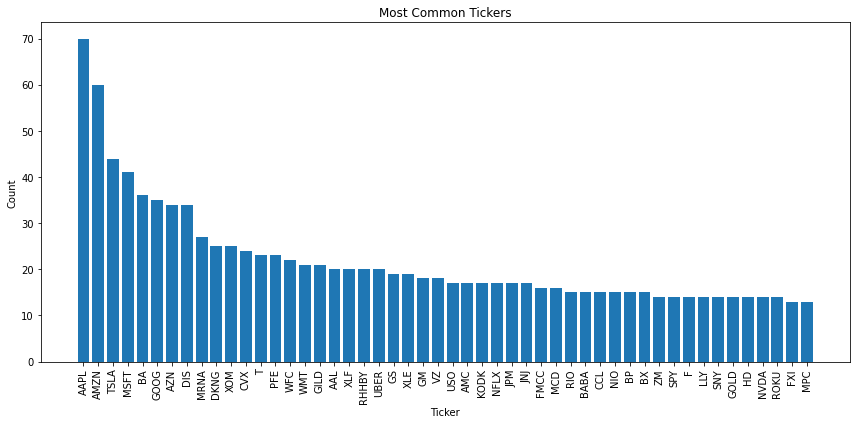

In [5]:
#How many different companies? 
unique_tickers=data['ticker'].unique() #get unique tickers (company names)
print("There are ", len(unique_tickers), " unique tickers.")
ticker_counts=data['ticker'].value_counts()
print("The most common tickers featured are: \n")
for ticker, count in ticker_counts.items(): 
    print(f"{ticker}: {count}")

#visualize
ticker_counts=data['ticker'].value_counts().head(50)
plt.figure(figsize=(12,6))
plt.bar(ticker_counts.index,ticker_counts.values)
plt.title('Most Common Tickers')
plt.xlabel('Ticker')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

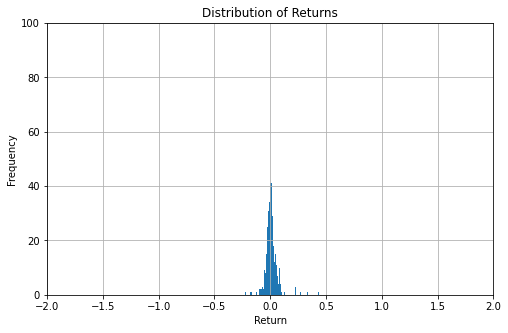

In [ ]:
#Overall returns distribution
plt.figure(figsize=(8,5))
plt.hist(data['return'],bins=1000000)
plt.xlim(-2,2)
plt.ylim(0,100)
plt.title('Distribution of Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#Seems to be centered around 0 (as expected, no bias involved)
#Doesn't seem to be many large outliers 

In [26]:
#double check for large outliers
print(data['return'].describe())
#maximum value is highly suspicious, investigate 
max_return=data['return'].max()
max_return_row=data[data['return']==max_return]

print("\nMaximum return value row: ", max_return_row) #clearly, this return is basically impossible, likely will need to remove it
#check for more outliers

outliers = data[abs(data['return']) > 5] #check for outliers representing more than %500 change
print(f"\nNumber of return outliers > 5 or < -5: {len(outliers)}")
print(outliers)

mean=data['return'].mean()
std=data['return'].std()
z_threshold=3 

outliers_z=data[(data['return']-mean).abs()>z_threshold*std] #check outliers using z-scores
print(f"\nNumber of outliers beyond {z_threshold} standard deviations: {len(outliers_z)}")
print(outliers_z)

print("\nLooks like the maximum value is WAY beyond the rest of the data, and all other return values are within -5 and 5, or within 3 standard deviations of the mean. Let's remove it.")
data=data[data['return'] != max_return] #remove this huge outlier
print("Max return after removal: ", data['return'].max())

count    10804.000000
mean         0.031694
std          2.946831
min         -0.581818
25%         -0.019625
50%          0.000000
75%          0.019745
max        306.142853
Name: return, dtype: float64

Maximum return value row:                                           Headlines ticker  \
7736   Banco de Sabadell, S.A. reports 1H results   BNDSF   

                     date      return  
7736  2020-07-31 07:35:00  306.142853  

Number of return outliers > 5 or < -5: 1
                                         Headlines ticker  \
7736   Banco de Sabadell, S.A. reports 1H results   BNDSF   

                     date      return  
7736  2020-07-31 07:35:00  306.142853  

Number of outliers beyond 3 standard deviations: 1
                                         Headlines ticker  \
7736   Banco de Sabadell, S.A. reports 1H results   BNDSF   

                     date      return  
7736  2020-07-31 07:35:00  306.142853  

Looks like the maximum value is WAY beyond the rest of the data

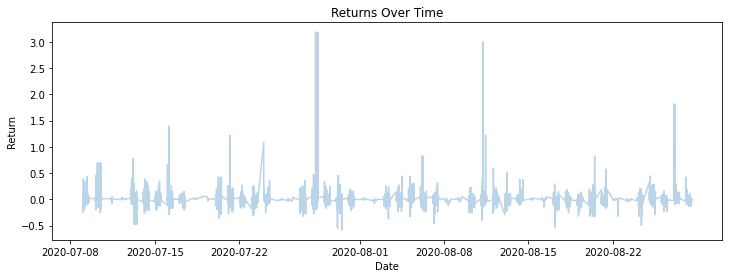

In [28]:
#return vs. date
data['date']=pd.to_datetime(data['date'])
data.sort_values('date',inplace=True)
plt.figure(figsize=(12, 4))
plt.plot(data['date'],data['return'],alpha=0.3)
plt.title('Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

In [35]:
#what words are most common? 
def tokenize(text): #function to split text into lowercase word tokens
    return re.findall(r'\b\w+\b',text.lower())

all_words=data['Headlines'].dropna().apply(tokenize).sum() #flatten all tokens
word_counts=Counter(all_words)

#top 20 most common
common_words=word_counts.most_common(20)
print("The most common words are: ")
for word,count in common_words: 
    print(f"{word}: {count}")



The most common words are: 
on: 3085
beats: 2970
0: 2667
by: 2222
revenue: 2186
eps: 2012
to: 1445
in: 1303
misses: 1173
q2: 1147
s: 1049
dividend: 939
for: 928
results: 830
reports: 813
declares: 761
of: 746
after: 708
and: 577
as: 523


In [37]:
#label polarity: positive/negative/neutral -> in case we want to do binary classification
data['label']=data['return'].apply(lambda x: 1 if x>0 else 0)
data.head()

,Headlines,ticker,date,return,label
13956,Virgin Galactic and Upwork among industrial g...,DSS,2020-07-09 01:01:00,-0.088750,0
13955,"DNJR leads financial gainers, BYFC and BSBK a...",BTBT,2020-07-09 01:07:00,-0.243243,0
13953,NeuroMetrix announces expanded distribution o...,NURO,2020-07-09 01:10:00,-0.071111,0
13951,Comscore renews agreement for ondemand essent...,SCOR,2020-07-09 01:20:00,0.066434,1
13950,Notable earnings before Friday's open,GBX,2020-07-09 01:21:00,0.155157,1
